<a href="https://colab.research.google.com/github/MehrabHussain47/Problem-Solving/blob/master/_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-:https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

# Using this dataset Apply several Method of feature Scaling and PCA

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wdbc.csv to wdbc.csv


In [3]:
df = pd.read_csv('wdbc.csv', header=None)

In [4]:
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

| 0        | 1   | 2     | 3     | 4     | 5     | 6       | 7       | 8      | 9       | 10     | 11      | 12     | 13     | 14    | 15    | 16       | 17      | 18      | 19      | 20      | 21       | 22    | 23    | 24    | 25    | 26     | 27     | 28     | 29     | 30     | 31      |
|:---------|:----|:------|:------|:------|:------|:--------|:--------|:-------|:--------|:-------|:--------|:-------|:-------|:------|:------|:---------|:--------|:--------|:--------|:--------|:---------|:------|:------|:------|:------|:-------|:-------|:-------|:-------|:-------|:--------|
| 842302   | M   | 17.99 | 10.38 | 122.8 | 1001  | 0.1184  | 0.2776  | 0.3001 | 0.1471  | 0.2419 | 0.07871 | 1.095  | 0.9053 | 8.589 | 153.4 | 0.006399 | 0.04904 | 0.05373 | 0.01587 | 0.03003 | 0.006193 | 25.38 | 17.33 | 184.6 | 2019  | 0.1622 | 0.6656 | 0.7119 | 0.2654 | 0.4601 | 0.1189  |
| 842517   | M   | 20.57 | 17.77 | 132.9 | 1326  | 0.08474 | 0.07864 | 0.0869 | 0.07017 | 0.1812 | 0.05667 | 0.5435 | 0.7339

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

In [8]:
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X)
X_standard_scaled_df = pd.DataFrame(X_standard_scaled, columns=X.columns)

In [9]:
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X)
X_minmax_scaled_df = pd.DataFrame(X_minmax_scaled, columns=X.columns)

In [10]:
pca_standard = PCA()
X_pca_standard = pca_standard.fit_transform(X_standard_scaled)
explained_variance_ratio_standard = pca_standard.explained_variance_ratio_

In [11]:
pca_minmax = PCA()
X_pca_minmax = pca_minmax.fit_transform(X_minmax_scaled)
explained_variance_ratio_minmax = pca_minmax.explained_variance_ratio_

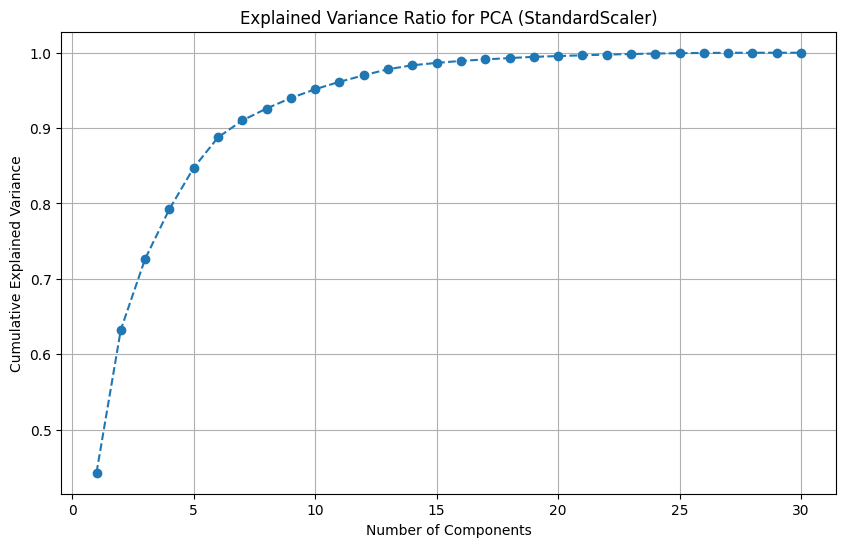

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_standard) + 1), explained_variance_ratio_standard.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio for PCA (StandardScaler)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.savefig('explained_variance_standard.png')

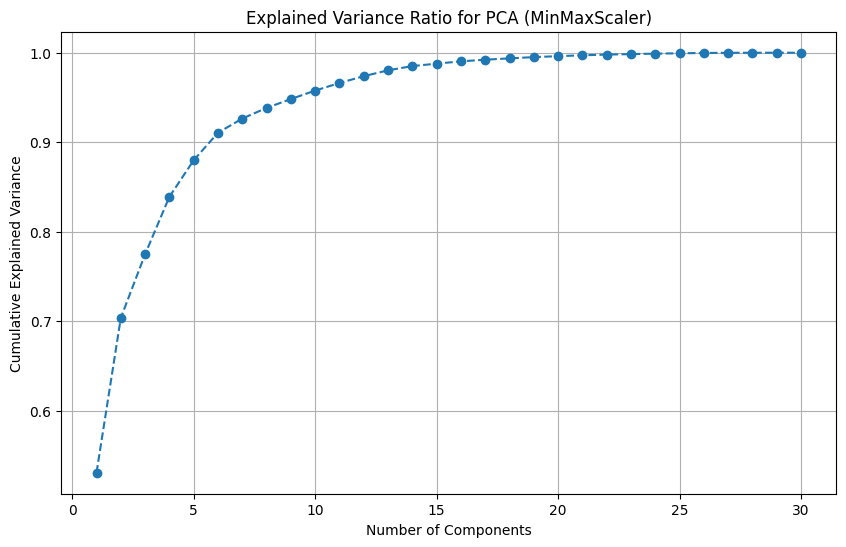

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_minmax) + 1), explained_variance_ratio_minmax.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio for PCA (MinMaxScaler)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.savefig('explained_variance_minmax.png')